In [12]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [13]:
def average_bins(array, binsize = 10):
    mean_mon = []
    for i in range(len(array)):
        mean_val = np.mean(array[i:i+binsize])
        mean_mon.append(mean_val)
        if i== len(array):
            break
        i += 10
    return mean_mon

In [14]:
def max_bins(array, binsize = 10):
    mean_mon = []
    for i in range(len(array)):
        mean_val = np.max(array[i:i+binsize])
        mean_mon.append(mean_val)
        if i== len(array):
            break
        i += 10
    return mean_mon

## MONTE CARLO REINFORCE

In [15]:
file_nobase = open(r'Cartpole\cartpole_reinforce_main.pkl', 'rb')
pickle_dump_nobase = pickle.load(file_nobase)
file_base = open(r'Cartpole\cartpole_reinforce_base_main.pkl', 'rb')
pickle_dump_base = pickle.load(file_base)


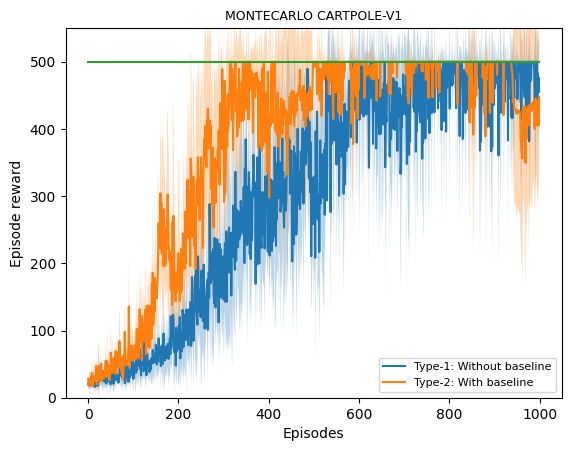

In [16]:
num_episodes = 1000

#No baseline
mean_score_nobase = np.mean(pickle_dump_nobase,axis = 0)
se_score_nobase = np.std(pickle_dump_nobase,axis = 0)

# With baseline
mean_score_base = np.mean(pickle_dump_base,axis = 0)
se_score_base = np.std(pickle_dump_base,axis = 0)

episode = np.arange(0,num_episodes)
max_line = 500* np.ones(num_episodes)

#plot
plt.figure()
plt.xlabel('Episodes')
plt.ylabel('Episode reward')

# Nobaseline plot
plt.plot(episode,mean_score_nobase, label = 'Type-1: Without baseline')
plt.fill_between(episode, 
                 mean_score_nobase-se_score_nobase, 
                 mean_score_nobase+se_score_nobase, 
                 alpha = 0.3)

# baseline plot
plt.plot(episode,mean_score_base, label = 'Type-2: With baseline')

plt.fill_between(episode, 
                 mean_score_base-se_score_base, 
                 mean_score_base+se_score_base, 
                 alpha = 0.3)

# Max line
plt.plot(episode, max_line)

plt.ylim(0,550)
plt.legend(fontsize = 8)
plt.title('MONTECARLO CARTPOLE-V1', fontsize = 9)
plt.show()

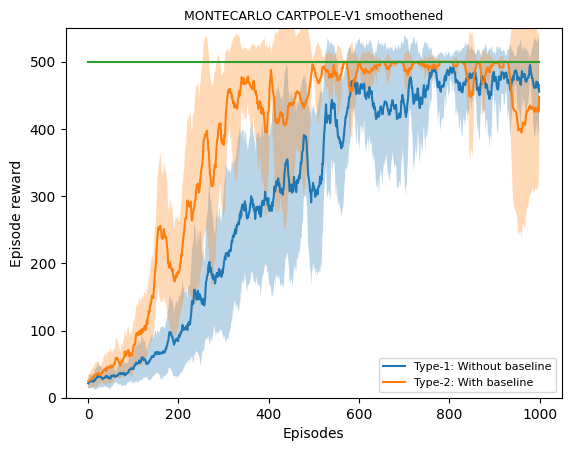

In [17]:
# Averaging every 10
avg_nobase = np.array(average_bins(mean_score_nobase))
avg_se_nobase = np.array(average_bins(se_score_nobase))

avg_base = np.array(average_bins(mean_score_base))
avg_se_base = np.array(average_bins(se_score_base))

num_episodes = 1000

episode = np.arange(0,num_episodes)
max_line = 500* np.ones(num_episodes)

#plot
plt.figure()
plt.xlabel('Episodes')
plt.ylabel('Episode reward')

# Nobaseline plot
plt.plot(episode,avg_nobase, label = 'Type-1: Without baseline')
plt.fill_between(episode, 
                 avg_nobase-avg_se_nobase, 
                 avg_nobase+avg_se_nobase, 
                 alpha = 0.3)

# baseline plot
plt.plot(episode,avg_base, label = 'Type-2: With baseline')

plt.fill_between(episode, 
                 avg_base-avg_se_base, 
                 avg_base+avg_se_base, 
                 alpha = 0.3)

# Max line
plt.plot(episode, max_line)

plt.ylim(0,550)
plt.legend(fontsize = 8)
plt.title('MONTECARLO CARTPOLE-V1 smoothened', fontsize = 9)
plt.show()

## DUELLING DQN

In [8]:
file_duelling_max = open(r'Cartpole\cartpole_duelling_avg_last.pkl', 'rb')
pickle_dump_duelling_max = pickle.load(file_duelling_max)

file_duelling_avg = open(r'Cartpole\cartpole_duelling_max_last.pkl', 'rb')
pickle_dump_duelling_avg = pickle.load(file_duelling_avg)

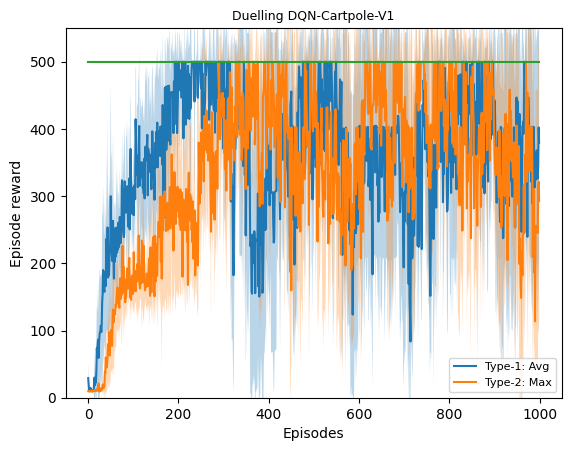

In [10]:
num_episodes = 1000

#MAX
mean_score_duelling_max = np.mean(pickle_dump_duelling_max,axis = 0)
se_score_duelling_max = np.std(pickle_dump_duelling_max,axis = 0)


# AVG
mean_score_duelling_avg = np.mean(pickle_dump_duelling_avg,axis = 0)
se_score_duelling_avg = np.std(pickle_dump_duelling_avg,axis = 0)


episode = np.arange(0,num_episodes)
max_line = 500* np.ones(num_episodes)

#plot
plt.figure()
plt.xlabel('Episodes')
plt.ylabel('Episode reward')
# AVG PLOT
plt.plot(episode,mean_score_duelling_avg, label = 'Type-1: Avg')

plt.fill_between(episode, 
                 mean_score_duelling_avg-se_score_duelling_avg, 
                 mean_score_duelling_avg+se_score_duelling_avg, 
                 alpha = 0.3)

# MAX PLOT
plt.plot(episode,mean_score_duelling_max, label = 'Type-2: Max')
plt.fill_between(episode, 
                 mean_score_duelling_max-se_score_duelling_max, 
                 mean_score_duelling_max+se_score_duelling_max, 
                 alpha = 0.3)





# Max line
plt.plot(episode, max_line)

#plt.xlim(0,500)
plt.ylim(0,550)
plt.legend(fontsize = 8)
plt.title('Duelling DQN-Cartpole-V1', fontsize = 9)
plt.show()

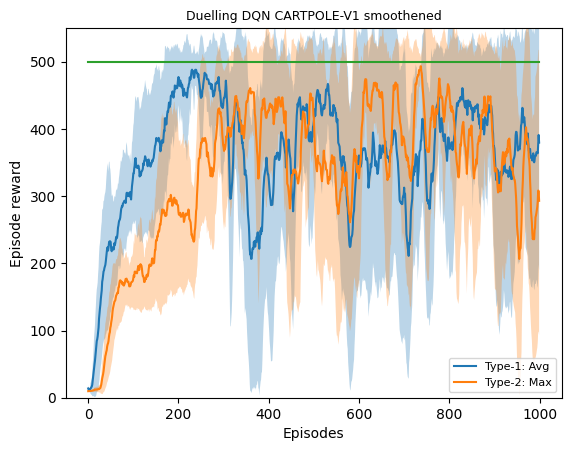

In [11]:
# Averaging every 10
avg_duelling_max = np.array(average_bins(mean_score_duelling_max,10))
avg_se_duelling_max = np.array(average_bins(se_score_duelling_max,10))

avg_duelling_avg = np.array(average_bins(mean_score_duelling_avg,10))
avg_se_duelling_avg = np.array(average_bins(se_score_duelling_avg,10))

num_episodes = 1000

episode = np.arange(0,num_episodes)
max_line = 500* np.ones(num_episodes)

#plot
plt.figure()
plt.xlabel('Episodes')
plt.ylabel('Episode reward')


# Avg plot
plt.plot(episode,avg_duelling_avg, label = 'Type-1: Avg')
plt.fill_between(episode, 
                 avg_duelling_avg-avg_se_duelling_avg, 
                 avg_duelling_avg+avg_se_duelling_avg, 
                 alpha = 0.3)


# baseline plot
plt.plot(episode,avg_duelling_max, label = 'Type-2: Max')

plt.fill_between(episode, 
                 avg_duelling_max-avg_se_duelling_max, 
                 avg_duelling_max+avg_se_duelling_max, 
                 alpha = 0.3)

# Max line
plt.plot(episode, max_line)
#plt.xlim(0,500)
plt.ylim(0,550)
plt.legend(fontsize = 8)
plt.title('Duelling DQN CARTPOLE-V1 smoothened', fontsize = 9)
plt.show()